In [1]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [4]:
set.seed(2018)
work_mul<-window(Seatbelts, end = 1982+11/12)
X <- work_mul[,-1]
y <- work_mul[,1]
y <- as.vector(y)
model <- cv.glmnet(X, y,lambda = 10^seq(4,-1,-0.1),keep = T)
best_lambda <- model$lambda.min
lasso_coeff <- predict(model,s = best_lambda,type = "coefficients")
best_lambda

[1] 0.2511886

In [5]:
lasso_coeff

8 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -2.178351e+01
drivers      7.974224e-02
front        .           
rear         5.979091e-03
kms          5.266322e-04
PetrolPrice  .           
VanKilled    6.207539e-02
law          .           

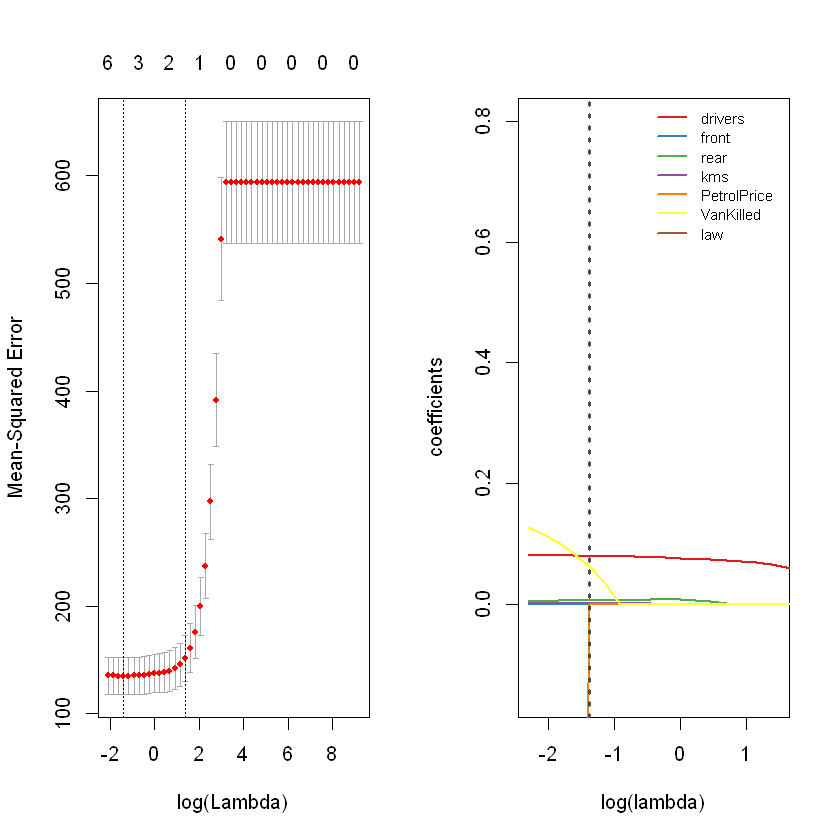

In [6]:
op=par(mfrow=c(1,2))
plot(model)
hatbeta <- as.matrix(model$glmnet.fit$beta)
lambda = log(10^seq(4,-1,-0.1))
plot(1,type = 'n',xlim = c(-2.3,1.5),ylim = c(-0.15,0.8),
     xlab = 'log(lambda)',ylab = 'coefficients')
colrs = RColorBrewer::brewer.pal(8,"Set1")
for (i in 1:6) {
  lines(lambda,hatbeta[i,],col=colrs[i],lwd=2)
}
abline(v=log(best_lambda),lty=3,lwd=3,col='gray30')
legend('topright',rownames(hatbeta),lty = 1,lwd=2,
       col=colrs,bty = 'n',cex = 0.75)

par(op)

In [8]:
pre=predict(model,X)

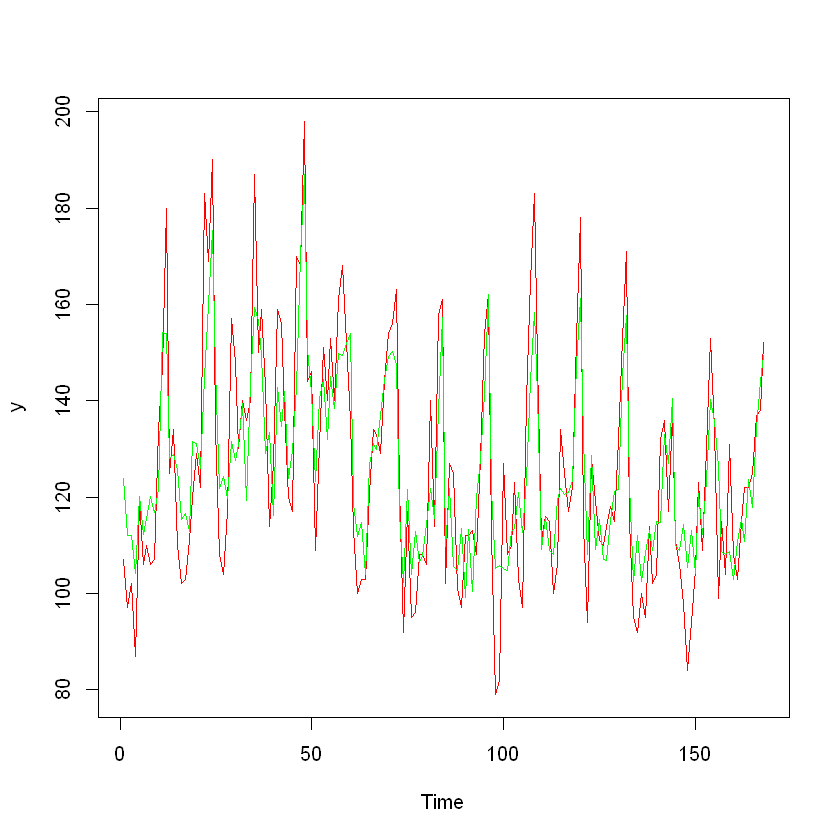

In [9]:
ts.plot(y,col="red")
lines(ts(pre),col="green")

In [10]:
rmse=(sum(((pre - y)**2))/length(y))^(1/2)
rmse

[1] 12.174